# Data Exploration
This notebook is a basic exploration of the dataset. It examines features, their relationships, and other properties of the data through the use of both plots and calculations.

In [30]:
import numpy as np
import pandas as pd 

df1 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.12/2022.06.12.csv')
df1["date"] = "2022.06.12"
df2 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.13/2022.06.13.csv')
df2["date"] = "2022.06.13"
df3 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.14/2022.06.14.csv')
df3["date"] = "2022.06.14"



df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration,date
0,0.0,0,0,786,31306.0,0.0,1,0,6,786,47613.0,1655074782132491,1655074782132491,0.0,outlier,0.0,2022.06.12
1,0.0,0,0,786,24298.0,0.0,1,0,6,786,47613.0,1655074782573321,1655074782573321,0.0,outlier,0.0,2022.06.12
2,0.0,0,0,786,31789.0,0.0,1,0,6,786,47613.0,1655074783148517,1655074783148517,0.0,outlier,0.0,2022.06.12
3,0.0,0,0,786,29409.0,0.0,1,0,6,786,47613.0,1655074783149855,1655074783149855,0.0,outlier,0.0,2022.06.12
4,0.0,0,0,786,60965.0,0.0,1,0,6,786,47613.0,1655074783167254,1655074783167254,0.0,outlier,0.0,2022.06.12


In [31]:
df.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,1.068376e+06,1.068376e+06,1.068376e+06,1068376.0,964168.000000,1.068376e+06,1.068376e+06,1.068376e+06,1.068376e+06,1068376.0,964168.000000,1.068376e+06,1.068376e+06,1.068376e+06,1.068376e+06
mean,4.964986e+06,6.999835e+02,3.620235e+03,786.0,14856.036961,3.024693e+00,7.804426e+00,4.931449e+00,5.609870e+00,786.0,36898.051885,1.504349e+15,1.505360e+15,1.303508e+04,1.518667e+00
std,8.431051e+07,3.288582e+03,8.257190e+03,0.0,16039.005055,2.342624e+00,2.169485e+01,1.491951e+01,1.870952e+00,0.0,17895.153177,4.521068e+14,4.507452e+14,6.594120e+04,5.734541e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,786.0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,786.0,11.000000,1.655076e+10,1.655089e+10,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,786.0,5900.000000,1.020244e+00,1.000000e+00,0.000000e+00,6.000000e+00,786.0,19780.000000,1.655092e+15,1.655092e+15,3.501955e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.300000e+01,786.0,9200.000000,3.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00,786.0,45332.000000,1.655163e+15,1.655163e+15,3.238136e+02,1.960000e-04
75%,3.571429e+01,3.400000e+01,2.904000e+03,786.0,9300.000000,5.021325e+00,7.000000e+00,5.000000e+00,6.000000e+00,786.0,47613.000000,1.655182e+15,1.655182e+15,2.067165e+04,2.278970e-01
max,4.294967e+09,6.548300e+04,6.553500e+04,786.0,65535.000000,1.342394e+02,2.550000e+02,2.550000e+02,4.700000e+01,786.0,65535.000000,1.655251e+15,1.655251e+15,3.979174e+06,4.102360e+01


In [32]:
# Average bytes in per request over these three days
# The earliest day seems much greater than the other two
df.groupby(["date"])["bytes_in"].mean()

date
2022.06.12    1411.193947
2022.06.13     554.408287
2022.06.14     779.984729
Name: bytes_in, dtype: float64

In [33]:
# Similarly, the bytes out is much greater 
# on 6/12/22
df.groupby(["date"])["bytes_out"].mean()

date
2022.06.12    1814.377689
2022.06.13    3385.810813
2022.06.14    3879.930691
Name: bytes_out, dtype: float64

## Plots

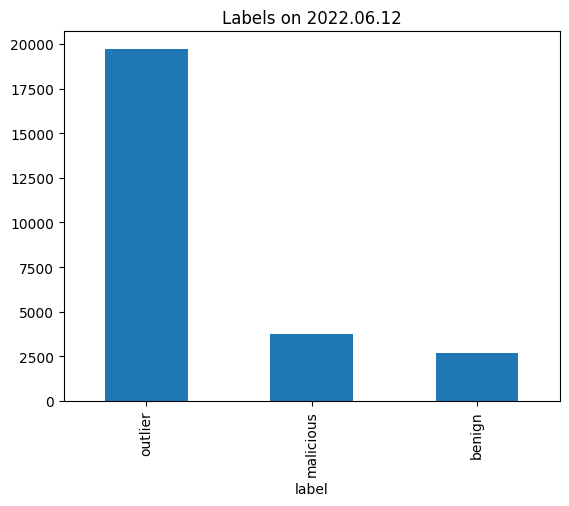

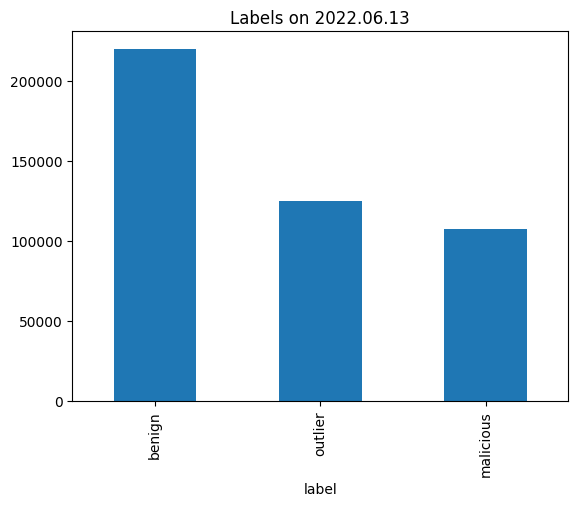

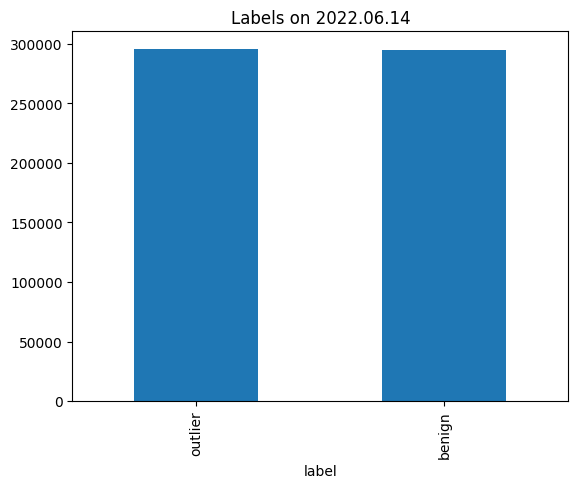

In [34]:
# It seems that there are a lot of outliers in the dataset, with the distribution of 
# labels changing everyday, it is interesting that 6/14/22 has no malicious labels
import matplotlib.pyplot as plt

for d in df["date"].unique():
    freq = df.loc[df["date"] == d]["label"].value_counts()
    freq.plot.bar(title=f"Labels on {d}")
    plt.show()

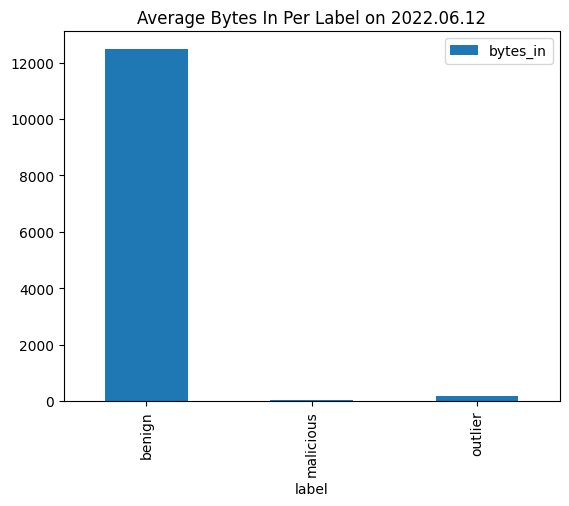

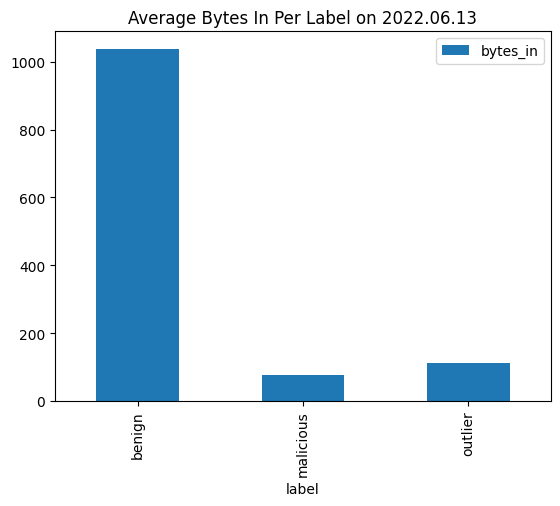

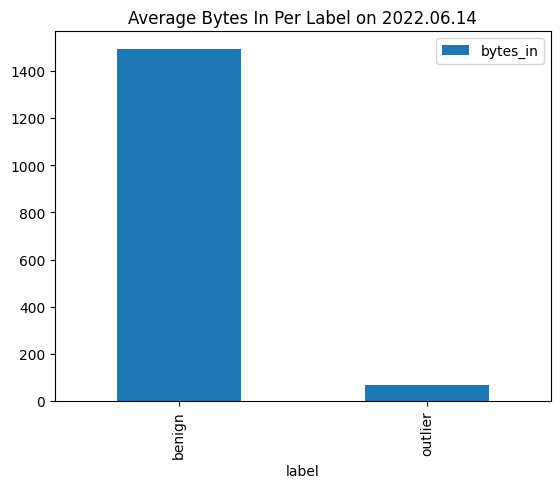

In [35]:
for d in df["date"].unique():
    avg_bytes_in = df.loc[df["date"] == d][["label", "bytes_in"]].groupby("label").mean()
    avg_bytes_in.plot.bar(title=f"Average Bytes In Per Label on {d}")
    plt.show()

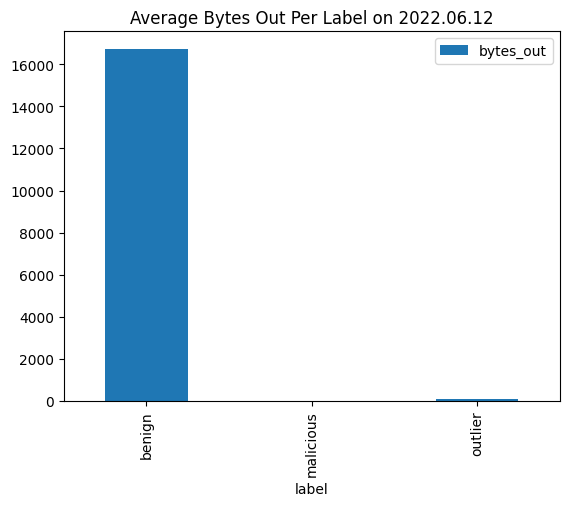

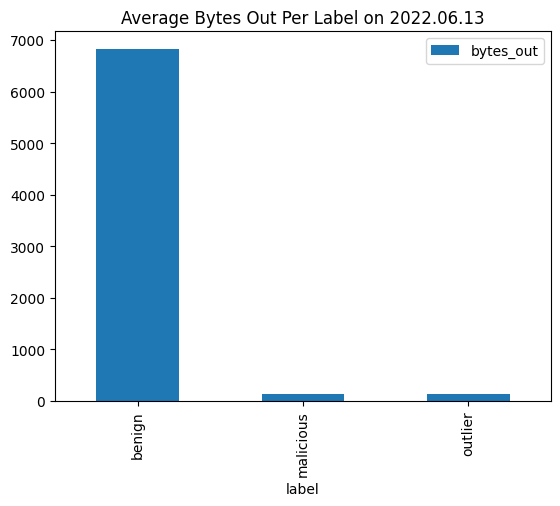

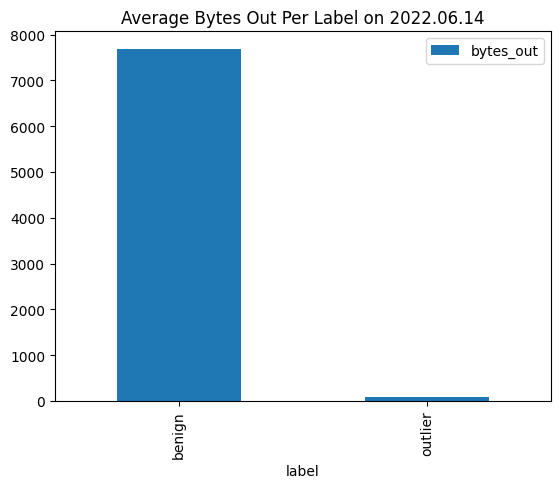

In [36]:
for d in df["date"].unique():
    avg_bytes_out = df.loc[df["date"] == d][["label", "bytes_out"]].groupby("label").mean()
    avg_bytes_out.plot.bar(title=f"Average Bytes Out Per Label on {d}")
    plt.show()

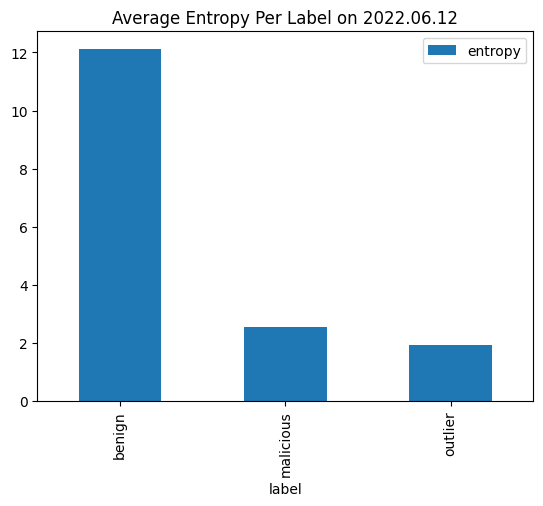

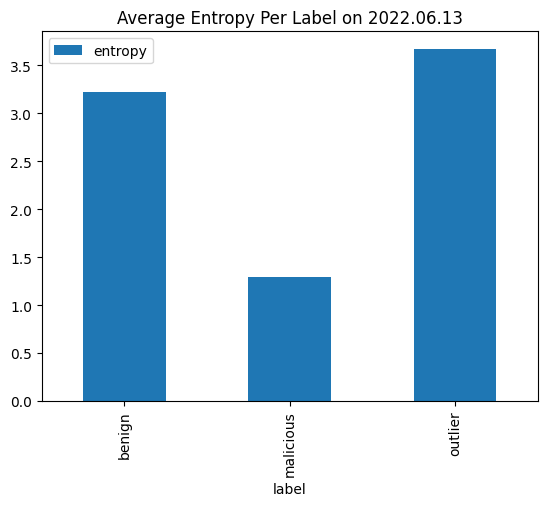

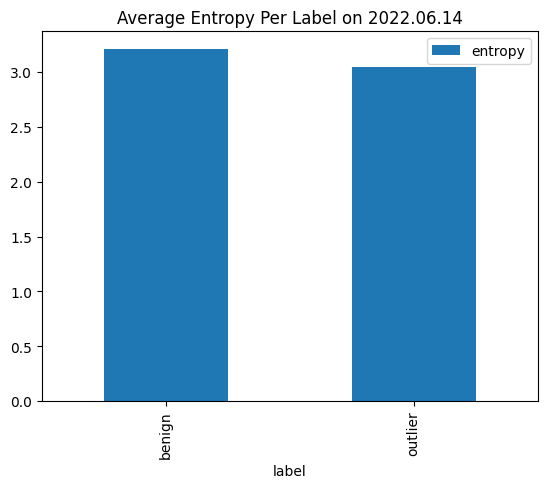

In [37]:
for d in df["date"].unique():
    avg_entropy = df.loc[df["date"] == d][["label", "entropy"]].groupby("label").mean()
    avg_entropy.plot.bar(title=f"Average Entropy Per Label on {d}")
    plt.show()

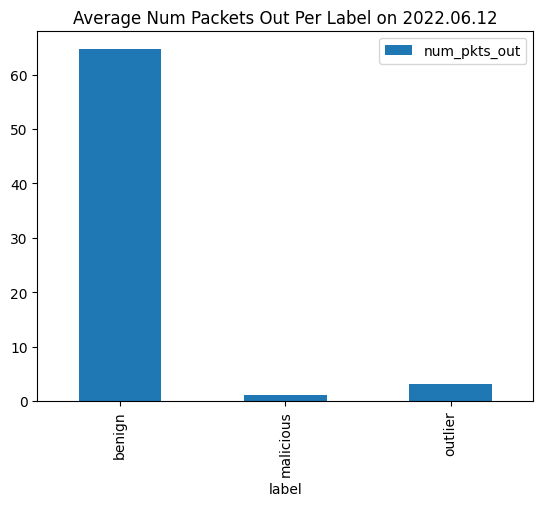

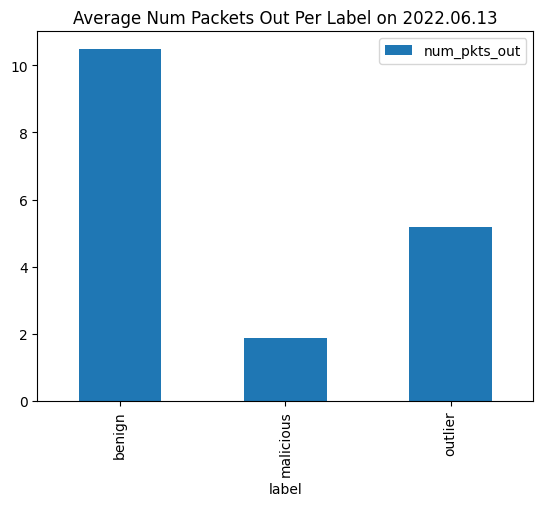

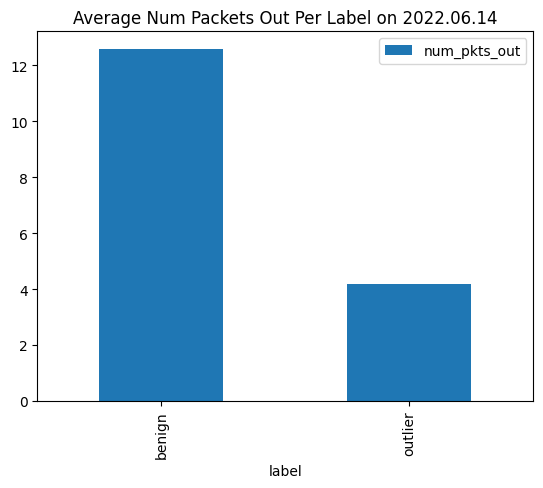

In [38]:
for d in df["date"].unique():
    avg_num_pkts_out = df.loc[df["date"] == d][["label", "num_pkts_out"]].groupby("label").mean()
    avg_num_pkts_out.plot.bar(title=f"Average Num Packets Out Per Label on {d}")
    plt.show()

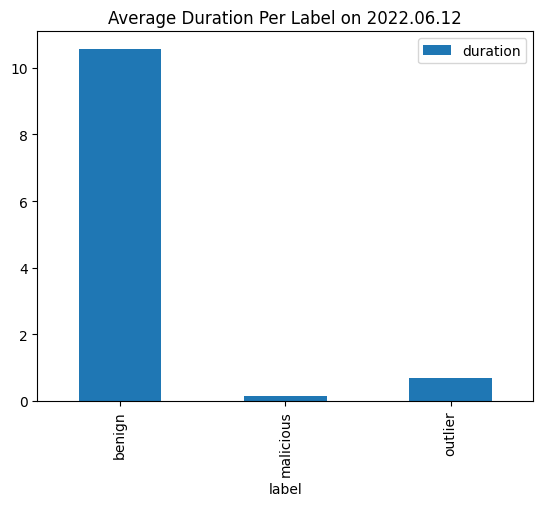

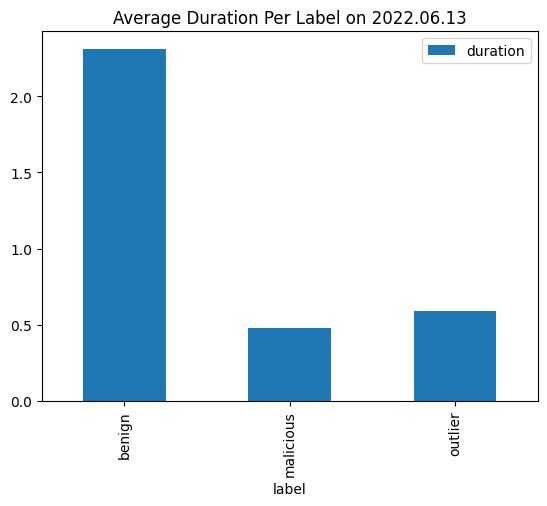

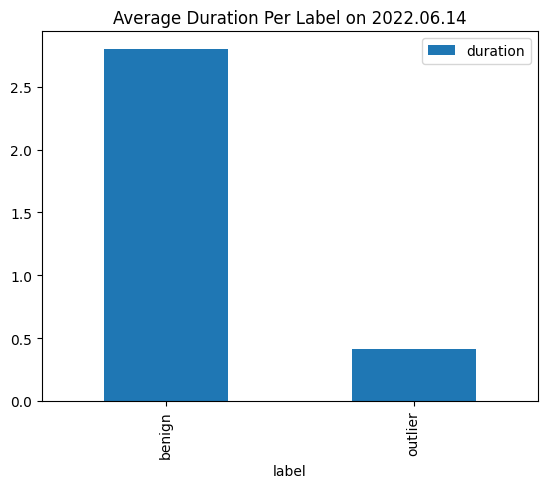

In [39]:
for d in df["date"].unique():
    avg_duration = df.loc[df["date"] == d][["label", "duration"]].groupby("label").mean()
    avg_duration.plot.bar(title=f"Average Duration Per Label on {d}")
    plt.show()

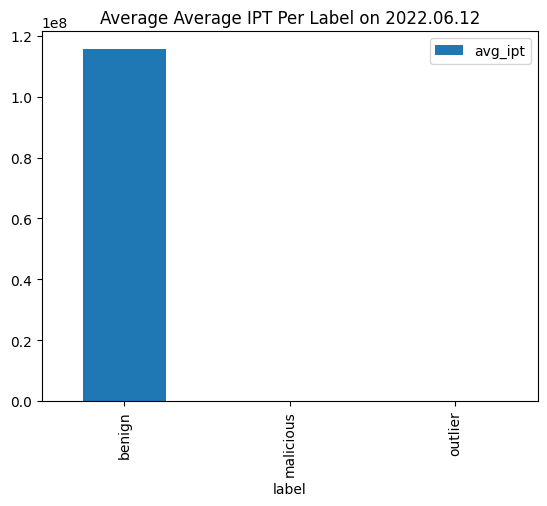

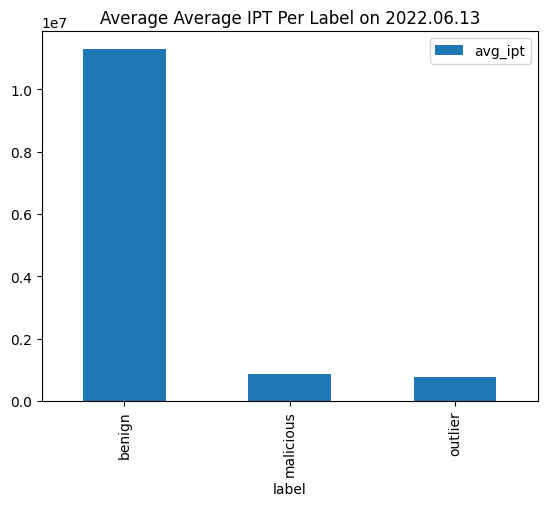

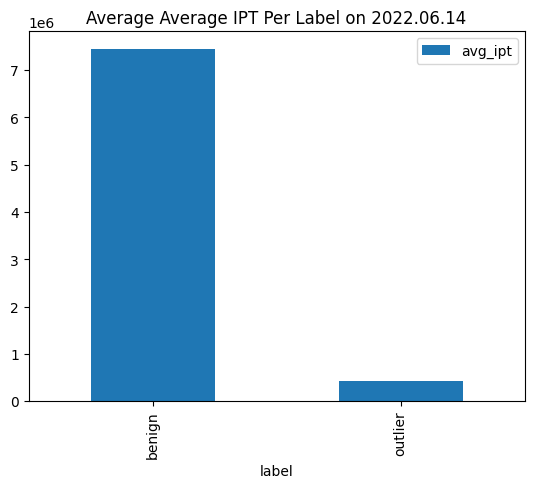

In [40]:
for d in df["date"].unique():
    avg_avg_ipt = df.loc[df["date"] == d][["label", "avg_ipt"]].groupby("label").mean()
    avg_avg_ipt.plot.bar(title=f"Average Average IPT Per Label on {d}")
    plt.show()

In [41]:
for label in df["label"].unique():
    label_df = df.loc[df["label"] == label]
    print(f"STATISTICS FOR LABEL: {label}")
    print(label_df.describe())

STATISTICS FOR LABEL: outlier
            avg_ipt       bytes_in      bytes_out   dest_ip      dest_port  \
count  4.401780e+05  440178.000000  440178.000000  440178.0  368843.000000   
mean   5.064653e+05      86.115576     100.687461     786.0    9814.259463   
std    4.556066e+07     621.798631     801.281654       0.0   14214.470557   
min    0.000000e+00       0.000000       0.000000     786.0       1.000000   
25%    0.000000e+00       0.000000       8.000000     786.0    3389.000000   
50%    2.120000e+01      13.000000      22.000000     786.0    5900.000000   
75%    1.021429e+02      34.000000      39.000000     786.0    5900.000000   
max    4.294967e+09   61151.000000   64886.000000     786.0   65531.000000   

             entropy   num_pkts_out    num_pkts_in          proto    src_ip  \
count  440178.000000  440178.000000  440178.000000  440178.000000  440178.0   
mean        3.173771       4.423888       4.470889       5.350535     786.0   
std         2.071165       4.6